Load and inspect data

In [ ]:
"""import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Drop 'subject' and 'Activity' columns (Assume no labels are known)
features_train = train.drop(columns=['Activity', 'subject'])
features_test = test.drop(columns=['Activity', 'subject'])

# Combine features for a single dataset
combined_features = pd.concat([features_train, features_test], axis=0)
print(f"Combined Dataset Shape: {combined_features.shape}")

# Separate Accelerometer and Gyroscope Features
accelerometer_features = [col for col in combined_features.columns if 'Acc' in col and 'Gyro' not in col]
gyroscope_features = [col for col in combined_features.columns if 'Gyro' in col]

acc_data = combined_features[accelerometer_features]
gyro_data = combined_features[gyroscope_features]

print(f"Accelerometer Data Shape: {acc_data.shape}")
print(f"Gyroscope Data Shape: {gyro_data.shape}")

# Feature Engineering
def calculate_extended_features(data):
    features = pd.DataFrame(index=data.index)  # Use the same index as the input data
    
    # Statistical Features
    features['mean'] = data.mean(axis=1)
    features['std'] = data.std(axis=1)
    features['min'] = data.min(axis=1)
    features['max'] = data.max(axis=1)
    features['skew'] = data.apply(skew, axis=1)
    features['kurtosis'] = data.apply(kurtosis, axis=1)
    features['range'] = data.max(axis=1) - data.min(axis=1)
    
    # Frequency-Domain Features (FFT)
    fft_features = []
    fft_columns = []
    for i, row in data.iterrows():
        fft_values = np.abs(np.fft.fft(row))
        fft_features.append([fft_values.mean(), fft_values.std()])  # Mean and std of FFT
        fft_columns += [f'fft_mean_{i}', f'fft_std_{i}']
    fft_features = np.array(fft_features)
    fft_df = pd.DataFrame(fft_features, columns=['fft_mean', 'fft_std'], index=data.index)
    
    # Pairwise Interactions (Product Features)
    interaction_features = {}
    num_cols = data.shape[1]
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            interaction_name = f"interaction_{i}_{j}"
            interaction_features[interaction_name] = data.iloc[:, i] * data.iloc[:, j]
    interaction_features = pd.DataFrame(interaction_features, index=data.index)
    
    # Combine all features
    extended_features = pd.concat([features, fft_df, interaction_features], axis=1)
    return extended_features




# Apply Extended Feature Engineering
acc_extended = calculate_extended_features(acc_data)
gyro_extended = calculate_extended_features(gyro_data)

# Combine Accelerometer and Gyroscope Features
combined_extended = pd.concat([acc_extended, gyro_extended], axis=1)

# Print the number of features before and after feature engineering
print(f"Number of Features Before Feature Engineering: {combined_features.shape[1]}")
print(f"Number of Features After Feature Engineering: {combined_extended.shape[1]}")

# Fit PCA on the combined extended data
pca_full = PCA()
pca_full.fit(combined_extended)

# Calculate explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance vs. Number of Principal Components (Extended Features)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Function to calculate PCA for a given variance percentage
def apply_pca(data, explained_variance):
    optimal_components = (cumulative_variance_ratio >= explained_variance).argmax() + 1
    print(f"Optimal Number of Components to Retain ~{int(explained_variance * 100)}% Variance: {optimal_components}")
    pca = PCA(n_components=optimal_components)
    reduced_data = pca.fit_transform(data)
    print(f"Reduced Combined Shape ({int(explained_variance * 100)}% Variance): {reduced_data.shape}")
    return reduced_data

explained_variance_percentage = 0.97 
pca_combined = apply_pca(combined_extended, explained_variance_percentage)


# Save Extended Features to a CSV File
combined_extended.to_csv('extended_features.csv', index=False)
print("Extended features saved to 'extended_features.csv'")

# Save PCA-Reduced Data to a CSV File
pca_reduced_df = pd.DataFrame(pca_combined)
pca_reduced_df.to_csv('pca_reduced_features.csv', index=False)
print("PCA-reduced features saved to 'pca_reduced_features.csv'")

"""

'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nfrom scipy.stats import skew, kurtosis\n\n# Load the datasets\ntrain = pd.read_csv(\'train.csv\')\ntest = pd.read_csv(\'test.csv\')\n\n# Drop \'subject\' and \'Activity\' columns (Assume no labels are known)\nfeatures_train = train.drop(columns=[\'Activity\', \'subject\'])\nfeatures_test = test.drop(columns=[\'Activity\', \'subject\'])\n\n# Combine features for a single dataset\ncombined_features = pd.concat([features_train, features_test], axis=0)\nprint(f"Combined Dataset Shape: {combined_features.shape}")\n\n# Separate Accelerometer and Gyroscope Features\naccelerometer_features = [col for col in combined_features.columns if \'Acc\' in col and \'Gyro\' not in col]\ngyroscope_features = [col for col in combined_features.columns if \'Gyro\' in col]\n\nacc_data = combined_features[accelerometer_features]\ngyro_data = combined_features[gyroscope_features]\n\nprint(f"Accelero

In [ ]:
import pandas as pd

# Load Extended Features
extended_features = pd.read_csv('extended_features.csv')
print(f"Loaded Extended Features Shape: {extended_features.shape}")

# Load PCA-Reduced Features
#pca_reduced_features = pd.read_csv('pca_reduced_features.csv')
#print(f"Loaded PCA-Reduced Features Shape: {pca_reduced_features.shape}")

from sklearn.decomposition import PCA

# Perform PCA on the extended features
pca = PCA(n_components=0.99)  
pca_reduced_features = pca.fit_transform(extended_features)

# Print the shape of the original and PCA-reduced data
print(f"Original Number of Features: {extended_features.shape[1]}")
print(f"Number of Features Afteoced_features.shape[1]}")

# save the PCA-reduced features to a CSV file
pca_reduced_df = pd.DataFrame(pca_reduced_features)
pca_reduced_df.to_csv('pca_reduced_features_99.csv', index=False)
print("PCA-reduced features saved to 'pca_reduced_features_99.csv'")



Loaded Extended Features Shape: (10299, 81936)
Original Number of Features: 81936
Number of Features After PCA (97% Variance): 171
PCA-reduced features saved to 'pca_reduced_features_97.csv'


Clustering Technieques 
1) K-Means Clustering

c:\ProgramData\anaconda3\envs\new_mlds\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePr

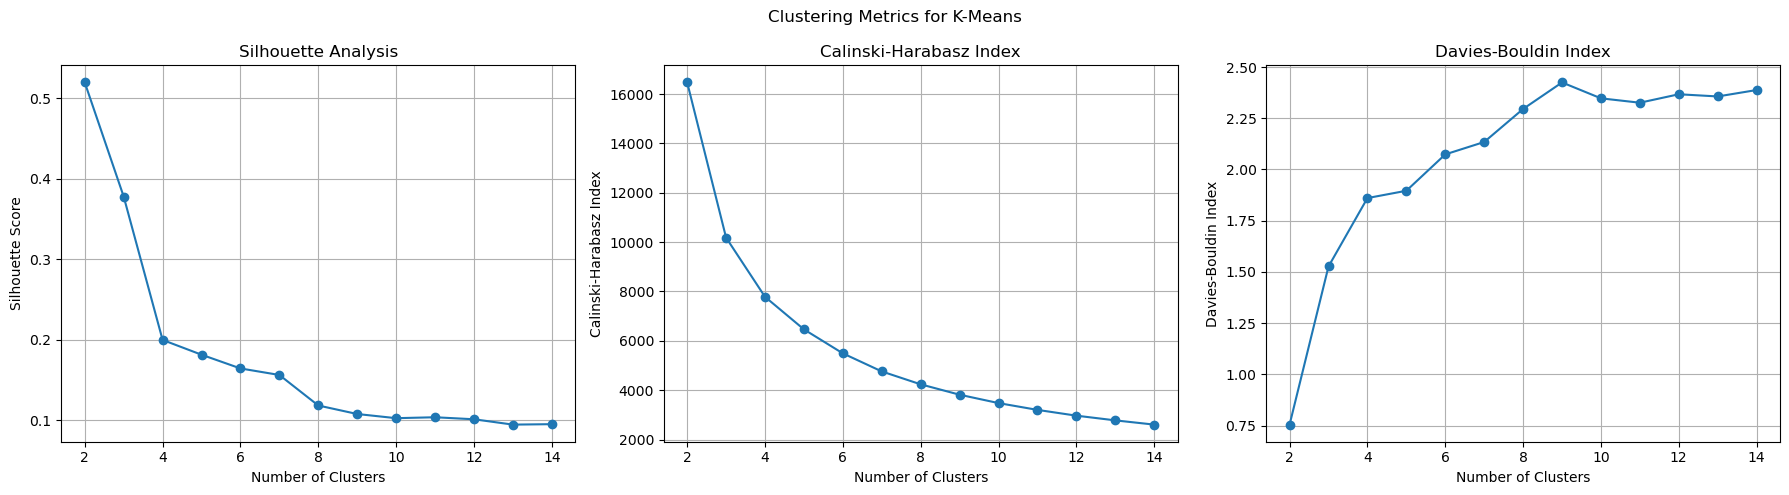

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define the range of clusters
k_values = range(2, 15)

# Initialize a dictionary to store metrics
metrics = {'silhouette': [], 'calinski': [], 'davies_bouldin': []}

# Perform K-Means clustering on the PCA-reduced data
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(pca_reduced_features)  # Use the PCA-reduced data
    cluster_labels = kmeans.labels_
    metrics['silhouette'].append(silhouette_score(pca_reduced_features, cluster_labels))
    metrics['calinski'].append(calinski_harabasz_score(pca_reduced_features, cluster_labels))
    metrics['davies_bouldin'].append(davies_bouldin_score(pca_reduced_features, cluster_labels))

# Plot the clustering metrics
plt.figure(figsize=(18, 5))
plt.suptitle("Clustering Metrics for K-Means")

# Plot Silhouette Scores
plt.subplot(1, 3, 1)
plt.plot(k_values, metrics['silhouette'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid()

# Plot Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(k_values, metrics['calinski'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index")
plt.grid()

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, metrics['davies_bouldin'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index")
plt.grid()

plt.tight_layout()
plt.show()


EM

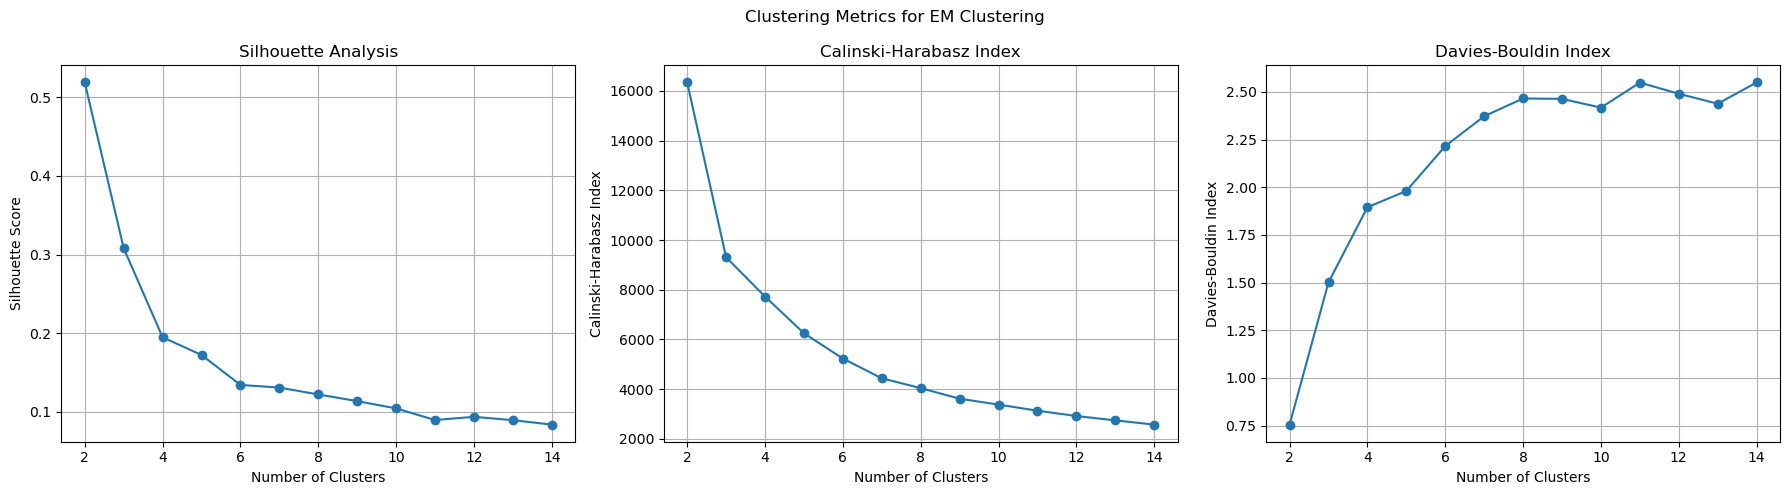

In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to perform EM clustering and calculate metrics
def perform_em_clustering(pca_data, k_values):
    metrics_em = {'silhouette': [], 'calinski': [], 'davies_bouldin': []}
    
    # EM clustering
    for k in k_values:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(pca_data)
        cluster_labels = gmm.predict(pca_data)
        metrics_em['silhouette'].append(silhouette_score(pca_data, cluster_labels))
        metrics_em['calinski'].append(calinski_harabasz_score(pca_data, cluster_labels))
        metrics_em['davies_bouldin'].append(davies_bouldin_score(pca_data, cluster_labels))
    
    return metrics_em

# Define the range of clusters
k_values = range(2, 15)

# Perform clustering on the PCA-reduced data
metrics_em = perform_em_clustering(pca_reduced_features, k_values)  

# Plot metrics for EM clustering
plt.figure(figsize=(18, 5))
plt.suptitle("Clustering Metrics for EM Clustering")

# Silhouette Analysis
plt.subplot(1, 3, 1)
plt.plot(k_values, metrics_em['silhouette'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid()

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(k_values, metrics_em['calinski'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index")
plt.grid()

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, metrics_em['davies_bouldin'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index")
plt.grid()

plt.tight_layout()
plt.show()


AgglomerativeClustering

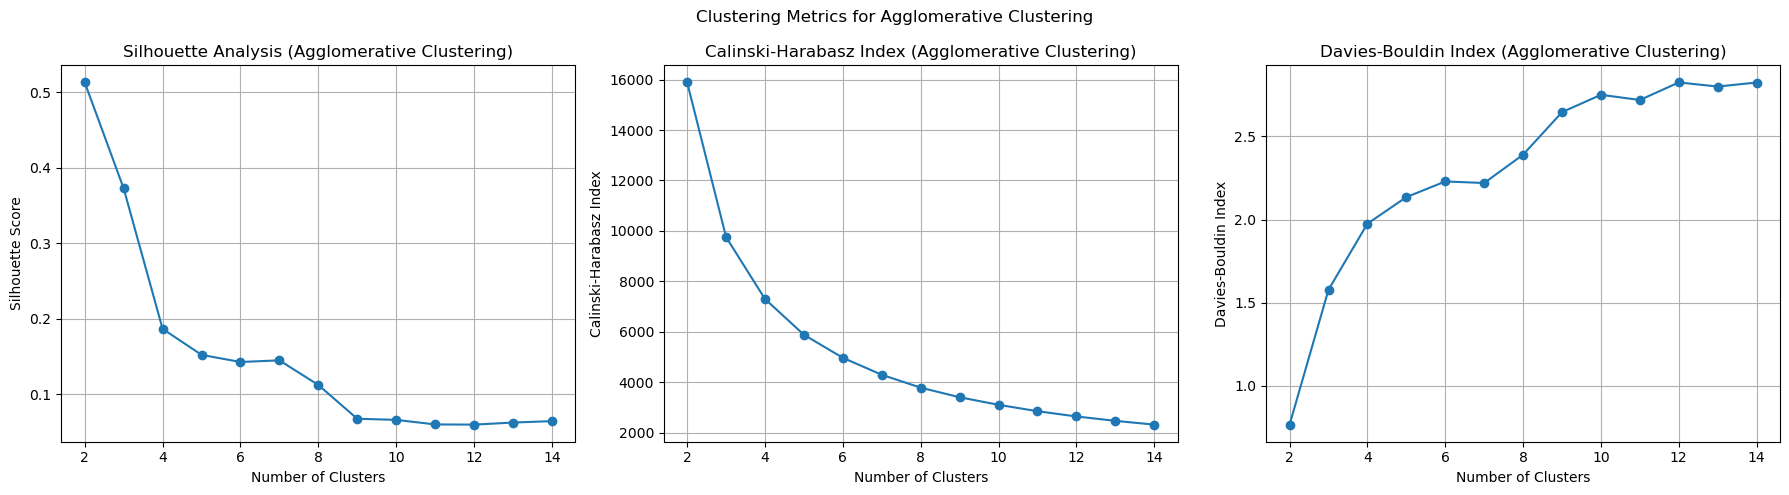

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the range of clusters
k_values = range(2, 15)

# Initialize a dictionary to store metrics for Agglomerative Clustering
agg_metrics = {'silhouette': [], 'calinski': [], 'davies_bouldin': []}

# Perform Agglomerative Clustering on the PCA-reduced data
for k in k_values:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agg_clustering.fit_predict(pca_reduced_features)  # Use the PCA-reduced data
    agg_metrics['silhouette'].append(silhouette_score(pca_reduced_features, cluster_labels))
    agg_metrics['calinski'].append(calinski_harabasz_score(pca_reduced_features, cluster_labels))
    agg_metrics['davies_bouldin'].append(davies_bouldin_score(pca_reduced_features, cluster_labels))

# Plot the clustering metrics for Agglomerative Clustering
plt.figure(figsize=(18, 5))
plt.suptitle("Clustering Metrics for Agglomerative Clustering")

# Plot Silhouette Scores
plt.subplot(1, 3, 1)
plt.plot(k_values, agg_metrics['silhouette'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (Agglomerative Clustering)")
plt.grid()

# Plot Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(k_values, agg_metrics['calinski'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index (Agglomerative Clustering)")
plt.grid()

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, agg_metrics['davies_bouldin'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index (Agglomerative Clustering)")
plt.grid()

plt.tight_layout()
plt.show()


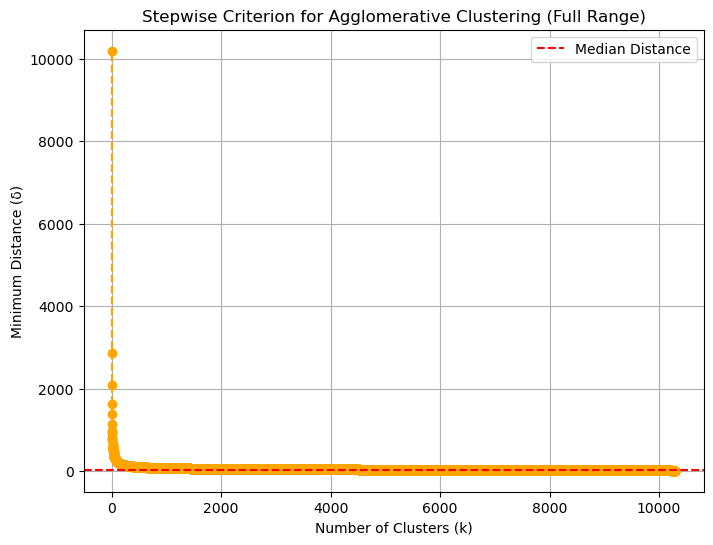

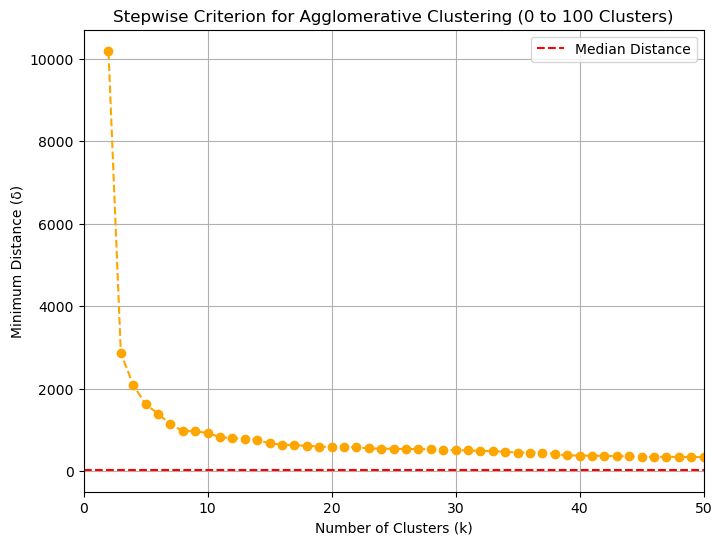

The optimal number of clusters (k*) is: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage


# Perform hierarchical clustering using 'ward' linkage
linkage_matrix = linkage(pca_reduced_features, method='ward')

# Extract the distances at each step
distances = linkage_matrix[:, 2]

# Generate the number of clusters (k) for each step
k_values = range(len(distances) + 1, 1, -1)  # From N clusters to 2 clusters

optimal_k_index = np.argmax(np.diff(distances)) + 1  # Find the point with the maximum distance change
optimal_k = k_values[optimal_k_index]

# Plot the original stepwise criterion (entire range)
plt.figure(figsize=(8, 6))
plt.plot(k_values, distances, marker='o', linestyle='--', color='orange')
plt.title("Stepwise Criterion for Agglomerative Clustering (Full Range)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Minimum Distance (δ)")
plt.axhline(y=np.median(distances), color='r', linestyle='--', label='Median Distance')
plt.legend()
plt.grid()
plt.show()

# Plot the stepwise criterion for the range of clusters from 0 to 100
plt.figure(figsize=(8, 6))
plt.plot(k_values, distances, marker='o', linestyle='--', color='orange')
plt.title("Stepwise Criterion for Agglomerative Clustering (0 to 100 Clusters)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Minimum Distance (δ)")
plt.axhline(y=np.median(distances), color='r', linestyle='--', label='Median Distance')
plt.legend()
plt.grid()


plt.xlim(0, 50)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters (k*) is: {optimal_k}")


PAM K-Medioid

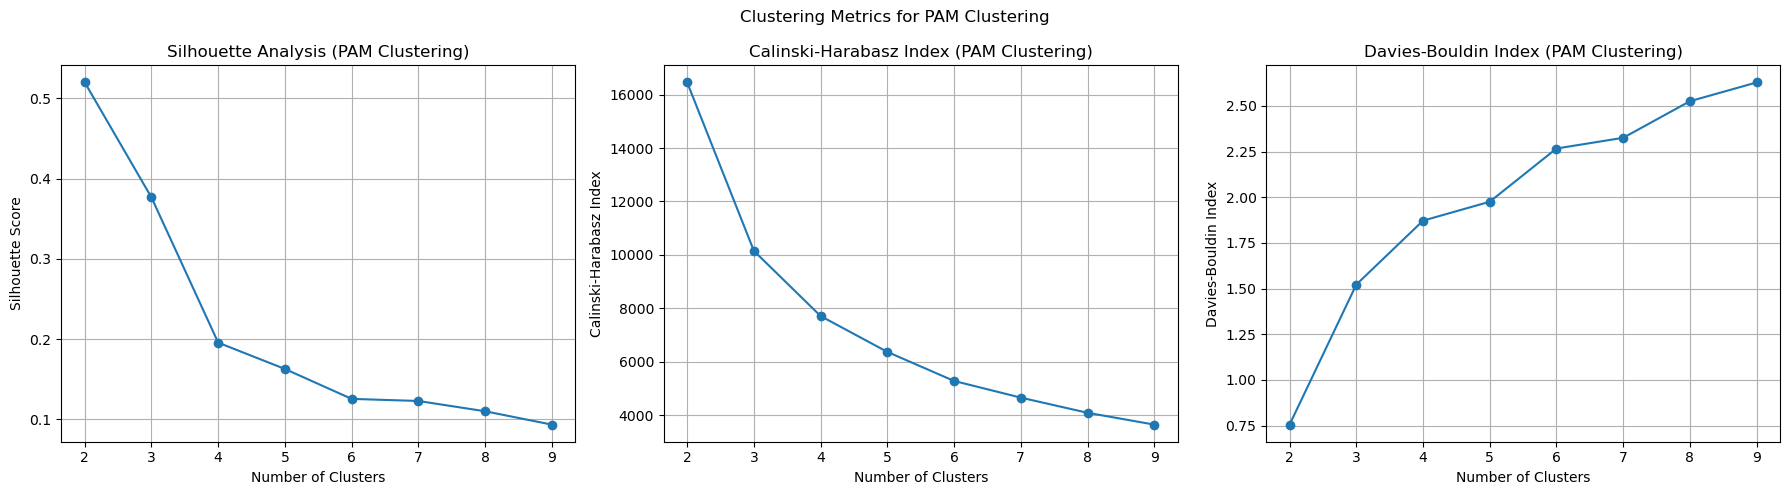

In [12]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to perform PAM clustering and calculate metrics
def pam_clustering_metrics(pca_data, k_values):
    metrics_pam = {'silhouette': [], 'calinski': [], 'davies_bouldin': []}
    for k in k_values:
        kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam')
        kmedoids.fit(pca_data)
        cluster_labels = kmedoids.labels_
        metrics_pam['silhouette'].append(silhouette_score(pca_data, cluster_labels))
        metrics_pam['calinski'].append(calinski_harabasz_score(pca_data, cluster_labels))
        metrics_pam['davies_bouldin'].append(davies_bouldin_score(pca_data, cluster_labels))
    return metrics_pam

# Define the range of clusters
k_values = range(2, 10)

# Perform PAM clustering for the PCA-reduced data
metrics_pam = pam_clustering_metrics(pca_reduced_features, k_values) 

# Plot metrics for PAM clustering
plt.figure(figsize=(18, 5))
plt.suptitle("Clustering Metrics for PAM Clustering")

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, metrics_pam['silhouette'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (PAM Clustering)")
plt.grid()

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(k_values, metrics_pam['calinski'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index (PAM Clustering)")
plt.grid()

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, metrics_pam['davies_bouldin'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index (PAM Clustering)")
plt.grid()

plt.tight_layout()
plt.show()


Compare with orginal labels

Combined Dataset Shape: (10299, 561)


c:\ProgramData\anaconda3\envs\new_mlds\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\envs\new_mlds\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePr


K-Means Cluster Composition:
Activity        LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
KMeans_Cluster                                                           
0                 1932     1774      1906        0                   0   
1                   12        3         0     1722                1406   

Activity        WALKING_UPSTAIRS  
KMeans_Cluster                    
0                              0  
1                           1544  


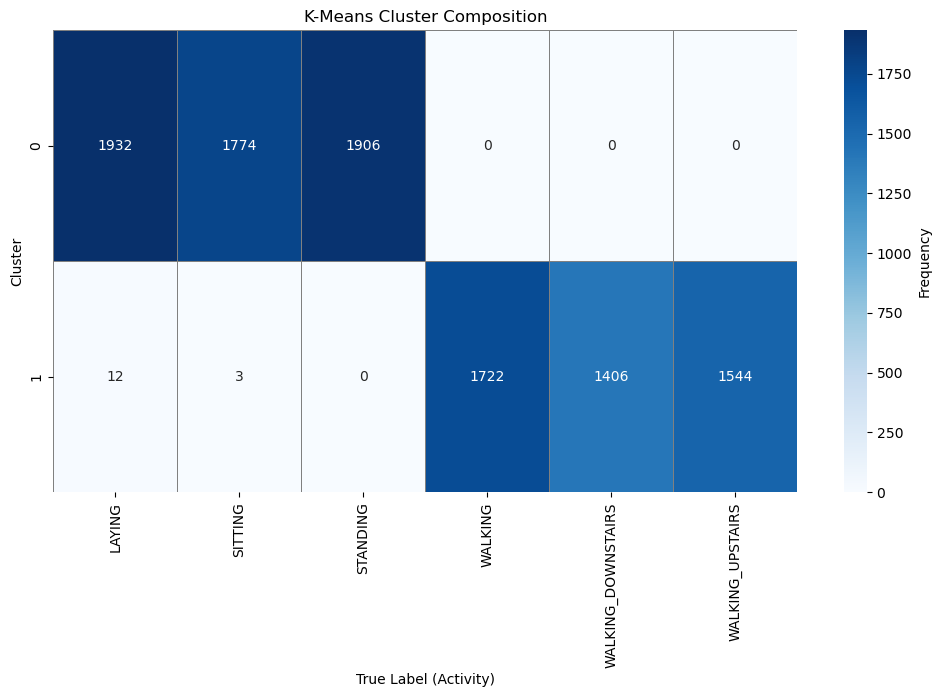


GMM Cluster Composition:
Activity     LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
GMM_Cluster                                                           
0              1932     1772      1894        0                   0   
1                12        5        12     1722                1406   

Activity     WALKING_UPSTAIRS  
GMM_Cluster                    
0                           0  
1                        1544  


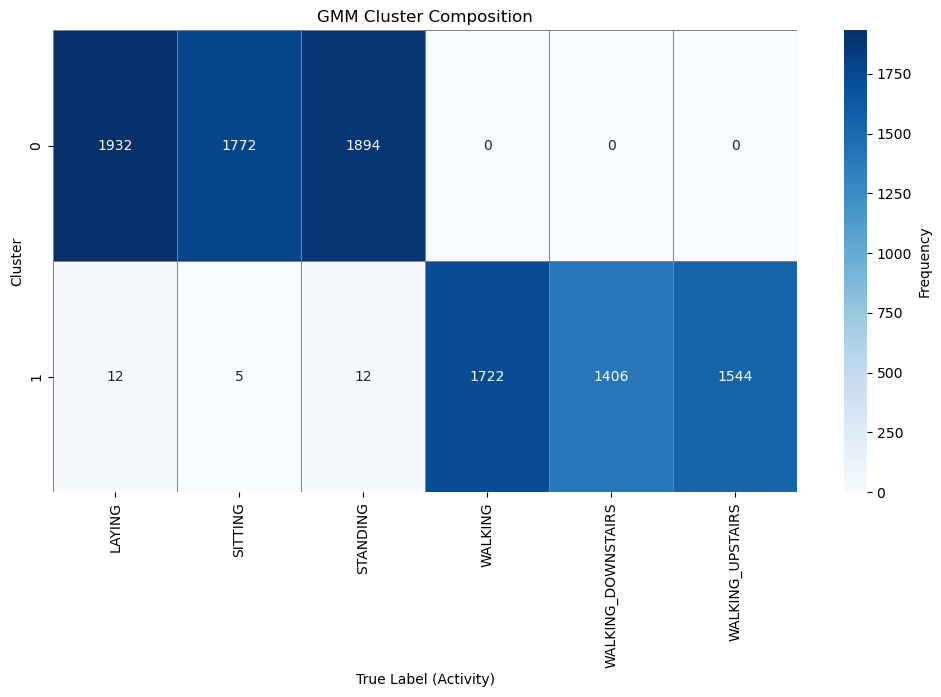


K-Medoids Cluster Composition:
Activity          LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
KMedoids_Cluster                                                           
0                     12        3         1     1722                1406   
1                   1932     1774      1905        0                   0   

Activity          WALKING_UPSTAIRS  
KMedoids_Cluster                    
0                             1544  
1                                0  


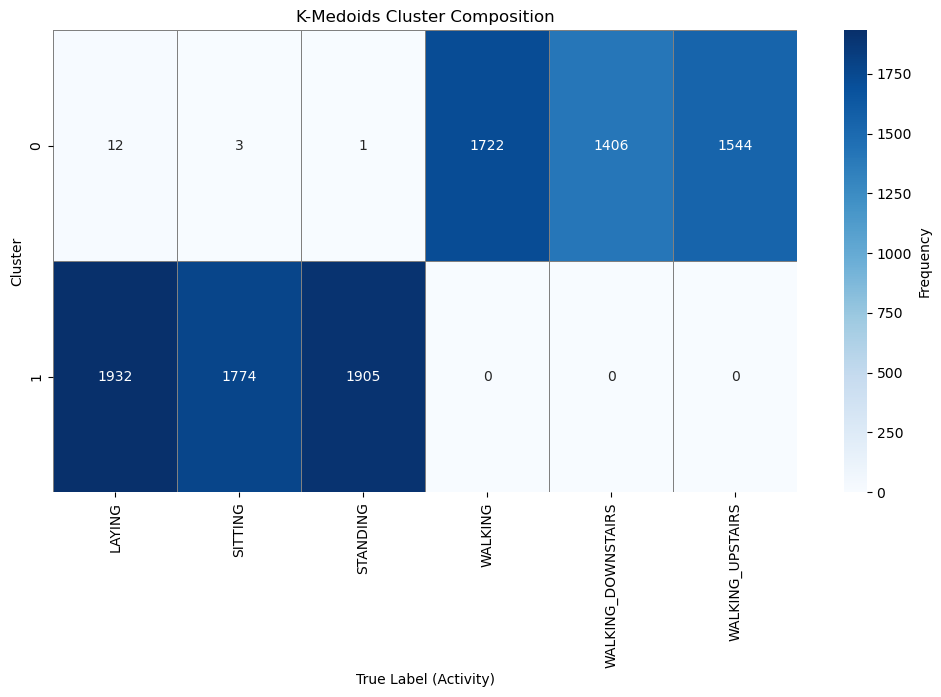


Agglomerative Clustering Cluster Composition:
Activity               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Agglomerative_Cluster                                                           
0                        1944     1777      1906        0                   0   
1                           0        0         0     1722                1406   

Activity               WALKING_UPSTAIRS  
Agglomerative_Cluster                    
0                                     0  
1                                  1544  


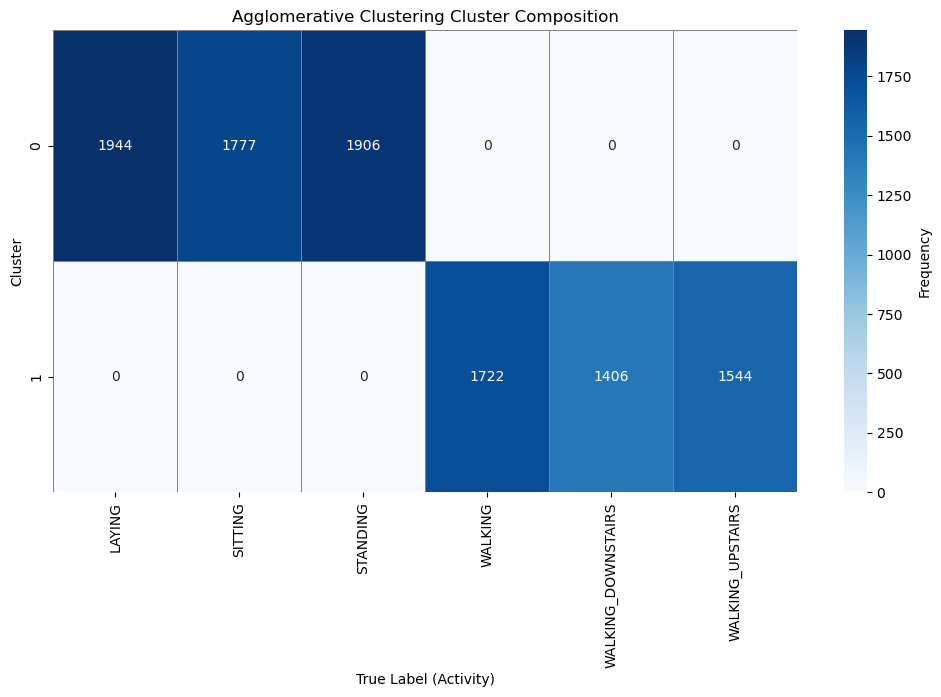


Clustering Metrics:
K-Means - NMI: 0.5495, ARI: 0.3307
GMM - NMI: 0.5429, ARI: 0.3290
K-Medoids - NMI: 0.5488, ARI: 0.3306
Agglomerative Clustering - NMI: 0.5568, ARI: 0.3325


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Separate features and labels
features_train = train.drop(columns=['Activity', 'subject'])
features_test = test.drop(columns=['Activity', 'subject'])
true_labels_train = train['Activity']
true_labels_test = test['Activity']

# Combine train and test sets
features = pd.concat([features_train, features_test], axis=0)
true_labels = pd.concat([true_labels_train, true_labels_test], axis=0)
print(f"Combined Dataset Shape: {features.shape}")

# Clustering (k=2 for optimal clustering)
k = 2

# K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(features)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(features)

# K-Medoids
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(features)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
agg_labels = agg_clustering.fit_predict(features)

# Combine true labels and predicted cluster labels into a DataFrame
data_analysis = pd.DataFrame({
    'True_Label': true_labels,
    'KMeans_Cluster': kmeans_labels,
    'GMM_Cluster': gmm_labels,
    'KMedoids_Cluster': kmedoids_labels,
    'Agglomerative_Cluster': agg_labels
})

# Analyze cluster compositions
def analyze_composition(labels, algorithm):
    composition = pd.crosstab(labels, true_labels)
    print(f"\n{algorithm} Cluster Composition:")
    print(composition)

    # Visualize composition as heatmaps with proper blue scaling
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        composition, annot=True, fmt='d', cmap='Blues', 
        linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Frequency'}
    )
    plt.title(f"{algorithm} Cluster Composition")
    plt.xlabel("True Label (Activity)")
    plt.ylabel("Cluster")
    plt.show()

# Use consistent blue scaling for all heatmaps
analyze_composition(data_analysis['KMeans_Cluster'], "K-Means")
analyze_composition(data_analysis['GMM_Cluster'], "GMM")
analyze_composition(data_analysis['KMedoids_Cluster'], "K-Medoids")
analyze_composition(data_analysis['Agglomerative_Cluster'], "Agglomerative Clustering")

# Clustering Metrics
def calculate_metrics(true_labels, predicted_labels, algorithm):
    nmi = normalized_mutual_info_score(true_labels, predicted_labels, average_method='arithmetic')
    ari = adjusted_rand_score(true_labels, predicted_labels)
    print(f"{algorithm} - NMI: {nmi:.4f}, ARI: {ari:.4f}")

# Calculate metrics for all algorithms
print("\nClustering Metrics:")
calculate_metrics(true_labels, kmeans_labels, "K-Means")
calculate_metrics(true_labels, gmm_labels, "GMM")
calculate_metrics(true_labels, kmedoids_labels, "K-Medoids")
calculate_metrics(true_labels, agg_labels, "Agglomerative Clustering")



K-Means Clustering Metrics:
Silhouette Score: 0.6105
Calinski-Harabasz Index: 17131.6767
Davies-Bouldin Index: 0.6141

K-Means Cluster Composition:
Activity     0     1     2     3     4     5
Cluster                                     
0         1931  1773  1900     2     1     5
1           13     4     6  1720  1405  1539


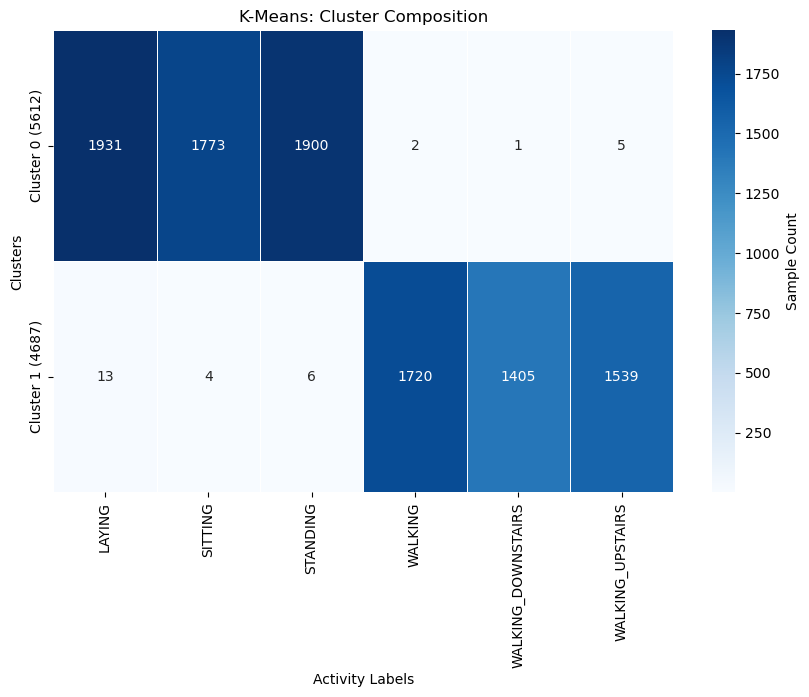


GMM Clustering Metrics:
Silhouette Score: 0.5981
Calinski-Harabasz Index: 16211.8082
Davies-Bouldin Index: 0.6224

GMM Cluster Composition:
Activity     0     1     2     3     4     5
Cluster                                     
0         1877  1743  1848     0     0     0
1           67    34    58  1722  1406  1544


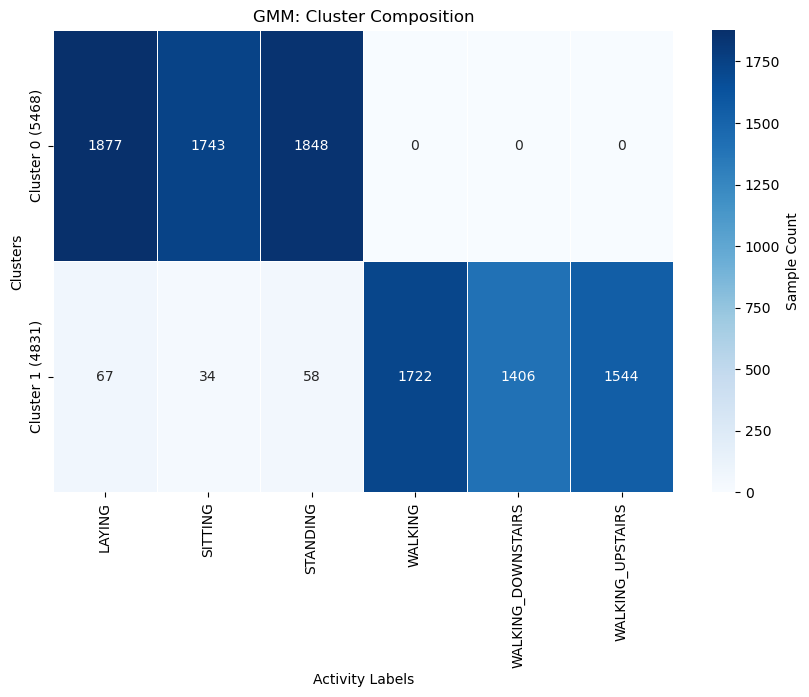


K-Medoids Clustering Metrics:
Silhouette Score: 0.6104
Calinski-Harabasz Index: 17124.1184
Davies-Bouldin Index: 0.6137

K-Medoids Cluster Composition:
Activity     0     1     2     3     4     5
Cluster                                     
0           16     5    11  1721  1405  1541
1         1928  1772  1895     1     1     3


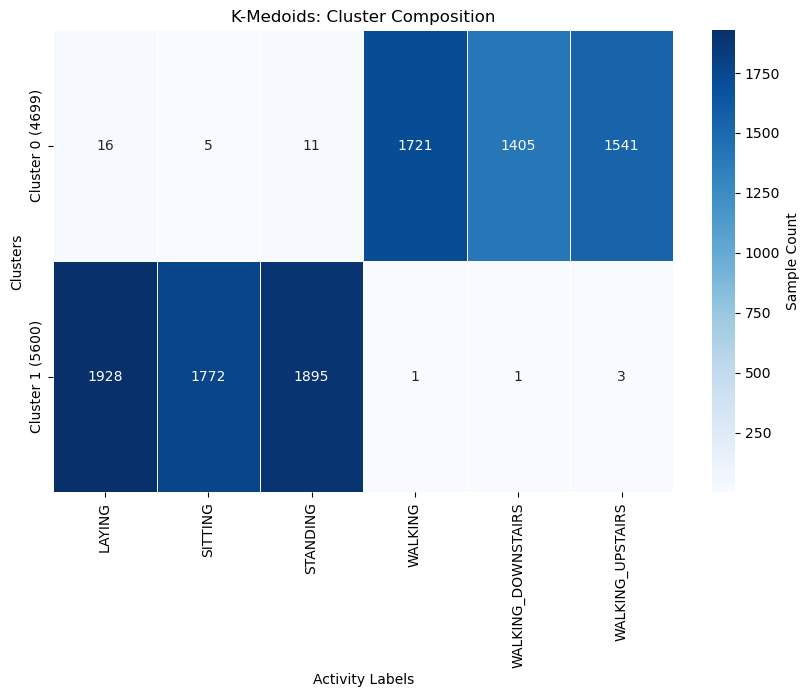


Agglomerative Clustering Metrics:
Silhouette Score: 0.6066
Calinski-Harabasz Index: 16852.7949
Davies-Bouldin Index: 0.6157

Agglomerative Cluster Composition:
Activity     0     1     2     3     4     5
Cluster                                     
0           38    20    18  1722  1406  1544
1         1906  1757  1888     0     0     0


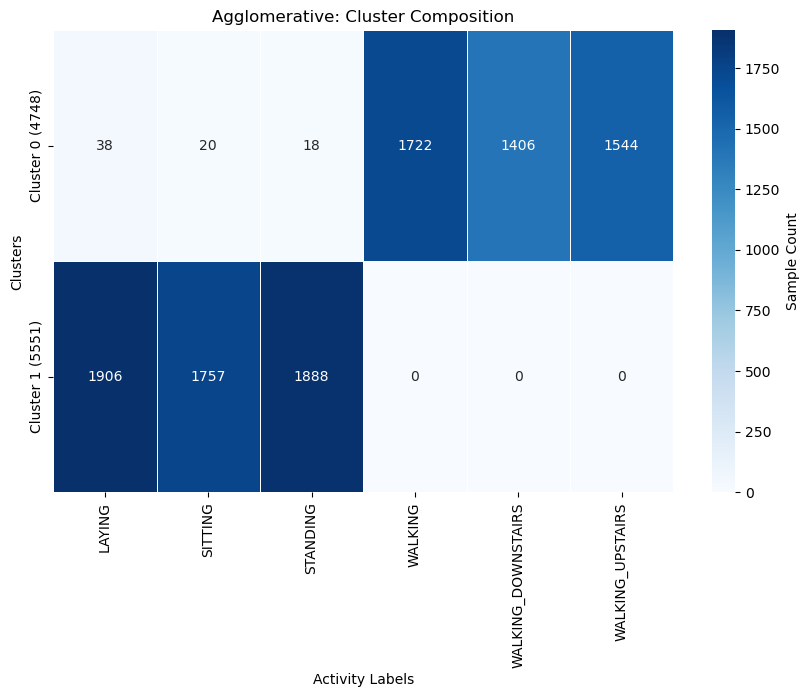

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Extract features and true labels
features_train = train.drop(columns=['Activity', 'subject'])
features_test = test.drop(columns=['Activity', 'subject'])
true_labels_train = train['Activity']
true_labels_test = test['Activity']

# Combine train and test sets
features = pd.concat([features_train, features_test], axis=0)
true_labels = pd.concat([true_labels_train, true_labels_test], axis=0)

# Encode true labels as numeric if they are strings
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
activity_labels = label_encoder.classes_

# Feature Engineering
accelerometer_features = [col for col in features.columns if 'Acc' in col and 'Gyro' not in col]
gyroscope_features = [col for col in features.columns if 'Gyro' in col]

acc_data = features[accelerometer_features]
gyro_data = features[gyroscope_features]

def calculate_statistical_features(data):
    features = pd.DataFrame()
    features['mean'] = data.mean(axis=1)
    features['std'] = data.std(axis=1)
    features['min'] = data.min(axis=1)
    features['max'] = data.max(axis=1)
    features['skew'] = data.apply(skew, axis=1)
    features['kurtosis'] = data.apply(kurtosis, axis=1)
    features['range'] = data.max(axis=1) - data.min(axis=1)
    return features

# Calculate statistical features
acc_stats = calculate_statistical_features(acc_data)
gyro_stats = calculate_statistical_features(gyro_data)
combined_stats = pd.concat([acc_stats, gyro_stats], axis=1)

# Standardize features
scaler = StandardScaler()
scaled_combined = scaler.fit_transform(combined_stats)

# Apply PCA
pca = PCA(n_components=0.999999)  # Retain ~100% variance
pca_combined = pca.fit_transform(scaled_combined)

# Clustering algorithms
clustering_algorithms = {
    "K-Means": KMeans(n_clusters=2, random_state=42, n_init=20),
    "GMM": GaussianMixture(n_components=2, random_state=42),
    "K-Medoids": KMedoids(n_clusters=2, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=2)
}

# Store results
results = {}

for name, algorithm in clustering_algorithms.items():
    if name == "GMM":
        predicted_labels = algorithm.fit_predict(pca_combined)
    else:
        predicted_labels = algorithm.fit_predict(pca_combined)
    
    # Calculate metrics
    silhouette = silhouette_score(pca_combined, predicted_labels)
    calinski_harabasz = calinski_harabasz_score(pca_combined, predicted_labels)
    davies_bouldin = davies_bouldin_score(pca_combined, predicted_labels)

    # Create a cluster composition table
    cluster_composition = pd.crosstab(index=pd.Series(predicted_labels, name="Cluster"),
                                       columns=pd.Series(true_labels_encoded, name="Activity"))
    
    results[name] = {
        "Silhouette": silhouette,
        "Calinski-Harabasz": calinski_harabasz,
        "Davies-Bouldin": davies_bouldin,
        "Composition": cluster_composition
    }

# Define a function to plot confusion matrix
def plot_cluster_composition(cluster_composition, cluster_totals, title, activity_labels):
    """
    Plot a confusion matrix-style heatmap for cluster composition with annotations.

    Parameters:
    - cluster_composition: DataFrame containing the cluster composition (e.g., from pd.crosstab).
    - cluster_totals: Dictionary with cluster totals (e.g., {"Cluster 0": 1234, "Cluster 1": 4567}).
    - title: Title for the heatmap.
    - activity_labels: List of activity labels.
    """
    # Create a DataFrame for annotation to include totals
    annot_data = cluster_composition.copy()
    annot_data.index = [f"Cluster {i} ({cluster_totals[i]})" for i in annot_data.index]

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        cluster_composition,
        annot=True,
        fmt='d',
        cmap="Blues",
        xticklabels=activity_labels,
        yticklabels=annot_data.index,
        linewidths=0.5,
        cbar_kws={"label": "Sample Count"}
    )
    plt.title(title)
    plt.xlabel("Activity Labels")
    plt.ylabel("Clusters")
    plt.show()

# Plot results for all algorithms
for name, metrics in results.items():
    print(f"\n{name} Clustering Metrics:")
    print(f"Silhouette Score: {metrics['Silhouette']:.4f}")
    print(f"Calinski-Harabasz Index: {metrics['Calinski-Harabasz']:.4f}")
    print(f"Davies-Bouldin Index: {metrics['Davies-Bouldin']:.4f}")
    print(f"\n{name} Cluster Composition:")
    print(metrics["Composition"])

    # Calculate cluster totals
    cluster_totals = metrics["Composition"].sum(axis=1).to_dict()

    # Plot cluster composition
    plot_cluster_composition(
        metrics["Composition"],
        cluster_totals,
        title=f"{name}: Cluster Composition",
        activity_labels=activity_labels
    )
